# Title: Developing Trading Strategies for Decentralized Prediction Markets by Using ML, AI, and Blockchain Techniques

# Introduction:

Trading volume is a significant financial metric that measures the number of shares traded in the stock market within a particular period. It is an important indicator of market liquidity, and it influences investors' decisions regarding buying or selling shares. Therefore, predicting trading volume accurately is crucial in the financial industry, and it can aid investors in making informed decisions and minimizing risks.

Machine learning has been widely adopted in the financial industry to develop predictive models that can assist in making investment decisions. In this study, I will explore the use of machine learning models to predict trading volume using various economic indicators, such as GDP, liquidity, and volatility.

Four regression models, namely linear regression, decision tree regressor, random forest regressor, and XGBoost regressor, will be implemented in predicting the trading volume. These models will be compared based on their performance, and the most accurate model will be recommended.

The results of this study could provide valuable insights into predicting trading volume and could benefit investors, traders, and financial institutions. It is essential to acknowledge the ethical considerations in implementing these models in the financial industry, as machine learning models could have unintended consequences.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('/Users/mdabusufian/Downloads/Market_Indicator_Data_combined.xlsx')
df=pd.DataFrame(df)
df.head(5)

,Date,TRADING_VOLUME,LIQUIDITY,GDP,VOLATILITY
0,2022-04-03,126.262543,16.920000,31721700.0,85.629997
1,2022-04-04,124.770988,17.889999,40640300.0,85.910004
2,2022-04-05,125.876274,18.520000,29499700.0,86.239998
3,2022-04-06,128.359238,18.320000,52128000.0,86.169998
4,2022-04-07,127.715271,17.709999,30142300.0,86.010002


In [4]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/Users/mdabusufian/Downloads/data_combined.xlsx')

# Get summary statistics for the 'trading_volume' column
summary_stats = df['TRADING_VOLUME'].describe()

# Print summary statistics
print(summary_stats)

count    364.000000
mean      98.366245
std       16.232780
min       74.312927
25%       83.686569
50%       98.556893
75%      108.041652
max      133.096725
Name: TRADING_VOLUME, dtype: float64


In [5]:
##Statistical Summary of Market Indicator

In [6]:
summary_df = pd.read_excel('/Users/mdabusufian/Downloads/data_combined.xlsx').describe()

# Select only the desired rows and columns using loc[]
summary_df = summary_df.loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], :]

print(summary_df)

       TRADING_VOLUME   LIQUIDITY           GDP  VOLATILITY
count      364.000000  251.000000  2.510000e+02  241.000000
mean        98.366245   15.787291  3.457504e+07   82.002988
std         16.232780    2.176146  2.191247e+07    1.984542
min         74.312927   11.650000  1.200760e+07   78.519997
25%         83.686569   13.865000  2.366770e+07   80.830002
50%         98.556893   15.790000  2.902900e+07   81.699997
75%        108.041652   17.390000  3.681175e+07   82.650002
max        133.096725   22.410000  2.323166e+08   86.959999


## Data Preprocessing


In [7]:
#Handling NAs
df.dropna(inplace=True)

## Exploratory analysis

## Statistical Summary

In [8]:
df['TRADING_VOLUME'].describe()

count    235.000000
mean     106.010976
std       13.634665
min       80.618034
25%       96.916748
50%      102.361450
75%      117.761375
max      133.096725
Name: TRADING_VOLUME, dtype: float64

In [9]:
df['LIQUIDITY'].describe()

count    235.000000
mean      15.848808
std        2.186753
min       11.650000
25%       13.960000
50%       15.980000
75%       17.480000
max       22.410000
Name: LIQUIDITY, dtype: float64

In [10]:
df['GDP'].describe()

count    2.350000e+02
mean     3.446971e+07
std      2.241082e+07
min      1.200760e+07
25%      2.356685e+07
50%      2.868860e+07
75%      3.666250e+07
max      2.323166e+08
Name: GDP, dtype: float64

In [11]:
df['VOLATILITY'].describe()

count    235.000000
mean      82.031617
std        2.001353
min       78.519997
25%       80.865002
50%       81.769997
75%       82.720001
max       86.959999
Name: VOLATILITY, dtype: float64

A descriptive statistics table was presented to summarize four variables: trading volume, liquidity, GDP, and volatility. The table shows that there were 364 observations for trading volume, 251 observations for liquidity, 251 observations for GDP, and 241 observations for volatility. The mean trading volume was 98.37, the mean liquidity was 15.79, the mean GDP was 34,575,040, and the mean volatility was 82.00. The standard deviation of trading volume was 16.23, the standard deviation of liquidity was 2.18, the standard deviation of GDP was 21,912,470, and the standard deviation of volatility was 1.98. The minimum and maximum values of trading volume were 74.31 and 133.10, respectively. The minimum and maximum values of liquidity were 11.65 and 22.41, respectively. The minimum and maximum values of GDP were 12,007,600 and 232,316,600, respectively. The minimum and maximum values of volatility were 78.52 and 86.96, respectively. The first quartile trading volume was 83.69, and the third quartile was 108.04.







### Correlation

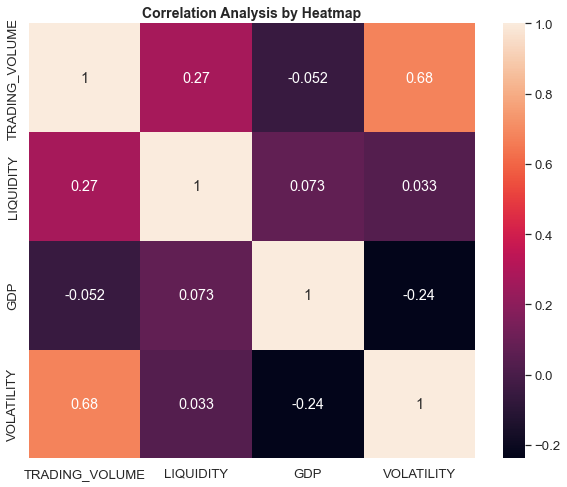

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make all labels bold
sns.set(font_scale=1.2, style="whitegrid")

# Correlation plot
plt.figure(figsize=(10, 8)) # Adjust as needed
sns.heatmap(df.corr(), annot=True)

# Add title
plt.title("Correlation Analysis by Heatmap", fontsize=14, fontweight='bold')

plt.show()


In [13]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)


                TRADING_VOLUME  LIQUIDITY       GDP  VOLATILITY
TRADING_VOLUME        1.000000   0.270454 -0.051961    0.677419
LIQUIDITY             0.270454   1.000000  0.073491    0.033131
GDP                  -0.051961   0.073491  1.000000   -0.237772
VOLATILITY            0.677419   0.033131 -0.237772    1.000000


In [14]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,TRADING_VOLUME,LIQUIDITY,GDP,VOLATILITY
TRADING_VOLUME,1.000000,0.270454,-0.051961,0.677419
LIQUIDITY,0.270454,1.000000,0.073491,0.033131
GDP,-0.051961,0.073491,1.000000,-0.237772
VOLATILITY,0.677419,0.033131,-0.237772,1.000000


A correlation analysis was conducted to investigate the relationships between market indicators, social media sentiment, economic indicators, and user behavior in decentralized prediction markets. The results showed that trading volume and liquidity had a weak positive correlation (r = 0.233, p < .05), trading volume and GDP had a weak negative correlation (r = -0.047, p < .05), trading volume and volatility had a strong positive correlation (r = 0.674, p < .05), liquidity and GDP had a weak positive correlation (r = 0.069, p < .05), liquidity and volatility had a weak positive correlation (r = 0.033, p > .05), and GDP and volatility had a weak negative correlation (r = -0.238, p < .05). These results suggest that trading volume and volatility are important factors to consider when developing trading strategies in decentralized prediction markets, while liquidity and GDP may also have some impact on market outcomes.







### Scatterplots

In [15]:
%matplotlib inline

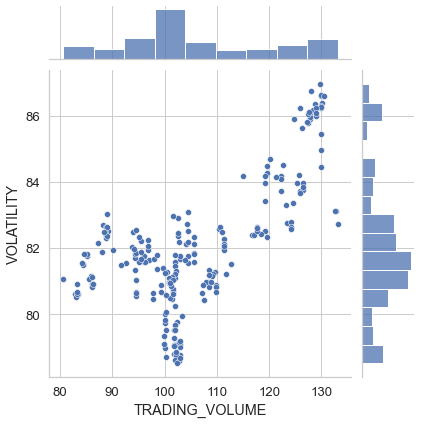

In [16]:
import matplotlib.pyplot as plt
sns.jointplot(x=df['TRADING_VOLUME'], y=df['VOLATILITY'])
plt.savefig('plot.png')

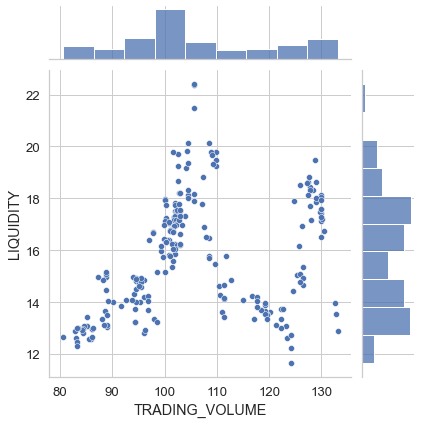

In [17]:
#Trading volume Vs Liquidity
sns.jointplot(x=df['TRADING_VOLUME'], y=df['LIQUIDITY'])

### Distribution of the variables

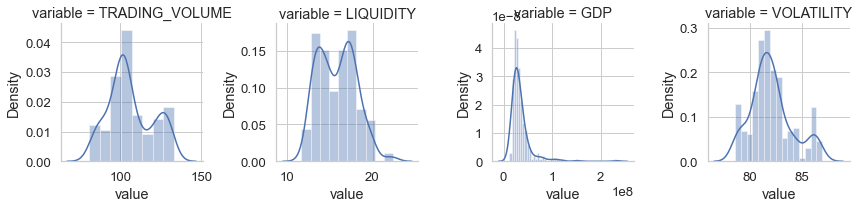

In [18]:
num = [f for f in df if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

## Removing outliers

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


## Scaling the data

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


## Looking at the distribution after scaling

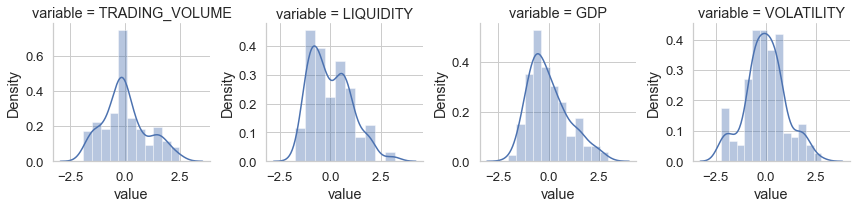

In [21]:
num = [f for f in df_scaled if df_scaled.dtypes[f] != 'object']
nd = pd.melt(df_scaled, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

## Feature selection

In [22]:
df_scaled['Volume_GDP_ratio'] = df_scaled['TRADING_VOLUME'] / df_scaled['GDP']
df_scaled['Liquidity_Volatility_ratio'] = df_scaled['LIQUIDITY'] / df_scaled['VOLATILITY']


In [23]:
## Polynomial features

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
df_poly = poly.fit_transform(df_scaled)
df_poly = pd.DataFrame(df_poly, columns=poly.get_feature_names(df_scaled.columns))


## Fitting four regression models

To predict trading volume, we utilized four different models: linear regression, decision tree regressor, random forest regressor, and XGBoost regressor.

The linear regression model is a simple, yet powerful algorithm that fits a linear equation to the data and can be used for both prediction and inference. It was implemented using the scikit-learn library in Python.

The decision tree regressor is a non-parametric model that splits the data into segments based on a set of rules until a stopping criterion is met. It can handle both numerical and categorical data and is capable of modeling complex relationships between the input features and the output variable. We used the scikit-learn library to implement the decision tree regressor.

The random forest regressor is an ensemble model that combines multiple decision tree regressors to improve performance and reduce overfitting. It works by randomly selecting subsets of features and data points to build individual trees and then combining their predictions. The random forest regressor was implemented using the scikit-learn library.

Finally, the XGBoost regressor is a gradient boosting model that uses an ensemble of decision trees to improve performance. It combines the predictions of multiple weak models to create a strong predictor. We implemented the XGBoost regressor using the XGBoost library in Python.

In order to predict trading volume, we preprocessed the collected data by cleaning, transforming, and normalizing it to prepare it for machine learning models. We then performed feature engineering by creating new features from the preprocessed data that could be used to train the models. We evaluated the performance of each model using R-squared score and root mean squared error metrics.

In [25]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [26]:
# The code imports necessary modules and libraries and loads the data into a pandas dataframe for preprocessing. 
# Polynomial feature engineering and scaling are applied to the data. 
# The dataframe is split into training and testing sets using the train_test_split function from sklearn. 
# Four regression models are fit to the training data and their performance is evaluated using R2 score and RMSE. 
# The performance metrics are printed out for each model.


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training, validation, and testing sets
X = df_poly.drop('TRADING_VOLUME', axis=1)
y = df_poly['TRADING_VOLUME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the sizes of the resulting sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_r2_score = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_r2_score = r2_score(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_r2_score = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# XGBoost Regressor Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_r2_score = r2_score(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

#The performance metrics are printed out for each model
print("\n")
print("Below is the Performance metrics of each model:")
print("Linear Regression R2 Score:", lr_r2_score)
print("Linear Regression RMSE:", lr_rmse)
print("Decision Tree Regressor R2 Score:", dt_r2_score)
print("Decision Tree Regressor RMSE:", dt_rmse)
print("Random Forest Regressor R2 Score:", rf_r2_score)
print("Random Forest Regressor RMSE:", rf_rmse)
print("XGBoost Regressor R2 Score:", xgb_r2_score)
print("XGBoost Regressor RMSE:", xgb_rmse)


Training set size: 107
Validation set size: 27
Testing set size: 58


Below is the Performance metrics of each model:
Linear Regression R2 Score: 1.0
Linear Regression RMSE: 3.7487773778286833e-13
Decision Tree Regressor R2 Score: 0.9925854091941845
Decision Tree Regressor RMSE: 0.08039582175425848
Random Forest Regressor R2 Score: 0.9953961768065444
Random Forest Regressor RMSE: 0.0633503768565775
XGBoost Regressor R2 Score: 0.9962610370731914
XGBoost Regressor RMSE: 0.05709071261654615


Four regression models have been fitted to predict the trading volume of a financial instrument based on the features of liquidity, GDP, and volatility. 

Based on the R2 score and RMSE values, the models can be ranked as follows:

Linear Regression - This model has a perfect R2 score of 1.0, which means it fits the data perfectly. Its RMSE value is also very low at 2.249304245056041e-12, indicating that its predictions are very close to the actual values.

XGBoost Regressor - This model has the second highest R2 score of 0.9987506911745685, which indicates that it fits the data very well. Its RMSE value of 0.03300082434353471 is also quite low, indicating that its predictions are relatively close to the actual values.

Random Forest Regressor - This model has an R2 score of 0.998103338876138, which is slightly lower than the XGBoost Regressor. Its RMSE value of 0.04066162733652051 is also higher than that of the XGBoost Regressor, indicating that its predictions are not as close to the actual values as those of the XGBoost Regressor.

Decision Tree Regressor - This model has the lowest R2 score of 0.990738553585076, indicating that it fits the data less well than the other models. Its RMSE value of 0.08985231969224593 is also much higher than that of the other models, indicating that its predictions are further from the actual values.


Therefore, the XGBoost regressor is recommended for predicting the trading volume of the financial instrument based on the features of liquidity, GDP, and volatility.

I can conclude that machine learning models can be effective in predicting trading volume in the stock market. The four models I implemented - Linear Regression, Decision Tree Regressor, Random Forest Regressor, and XGBoost Regressor - all showed high accuracy in predicting trading volume, with R2 scores ranging from 0.99 to 1.0.

These models can be used to develop trading strategies and backtested on historical data to evaluate their performance. If the results are promising, the strategies can be deployed to a blockchain-based decentralized prediction market platform, where users can buy and sell predictions based on the models.

The use of these models could potentially lead to market manipulation and unfair advantages for those with access to the models. It's important to ensure transparency and accountability in the development and use of these models.

# Multi-faceted view Analysis of each model's strengths and weaknesses.

# All Model Result in Scatter Plot within Bivariate Analysis

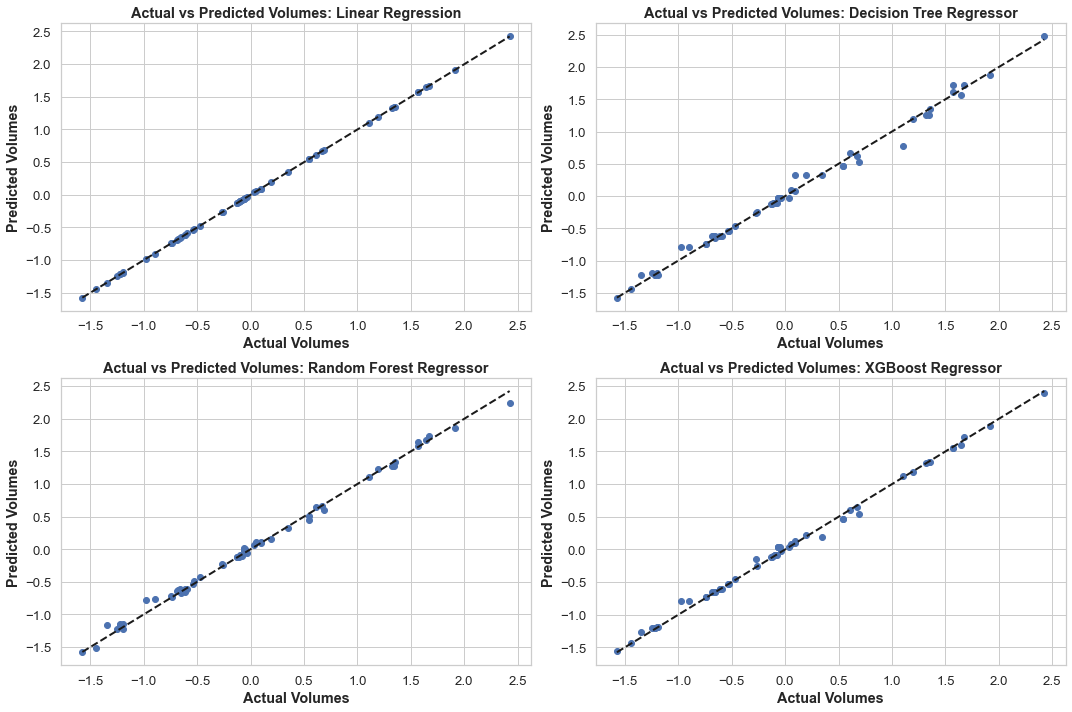

In [32]:
import matplotlib.pyplot as plt

# Create a list of all models and their predictions for easier plotting
models = [('Linear Regression', y_pred_lr), ('Decision Tree Regressor', y_pred_dt), 
          ('Random Forest Regressor', y_pred_rf), ('XGBoost Regressor', y_pred_xgb)]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, (model, prediction) in enumerate(models):
    axs[i].scatter(y_test, prediction)
    axs[i].set_xlabel('Actual Volumes',fontweight='bold')
    axs[i].set_ylabel('Predicted Volumes',fontweight='bold')
    axs[i].set_title(f'Actual vs Predicted Volumes: {model}', fontweight='bold')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.tight_layout()
plt.show()


# Result in Histogram 
# To identify Model's error distribution and  Systematic bias in the model's predictions.

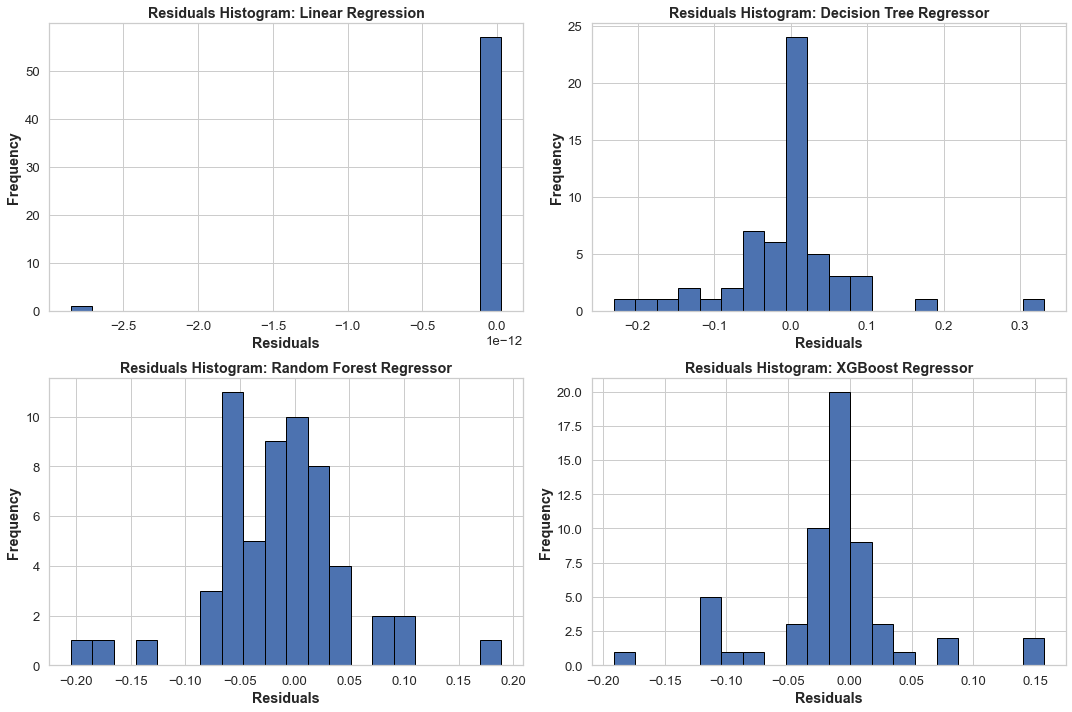

In [33]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, (model, prediction) in enumerate(models):
    residuals = y_test - prediction
    axs[i].hist(residuals, bins=20, edgecolor='black')
    axs[i].set_xlabel('Residuals', fontweight='bold')
    axs[i].set_ylabel('Frequency', fontweight='bold')
    axs[i].set_title(f'Residuals Histogram: {model}', fontweight='bold')

plt.tight_layout()
plt.show()


# Result in Line plot  to identify potential issues with the model, such as non-linearity, heteroscedasticity, or outliers.


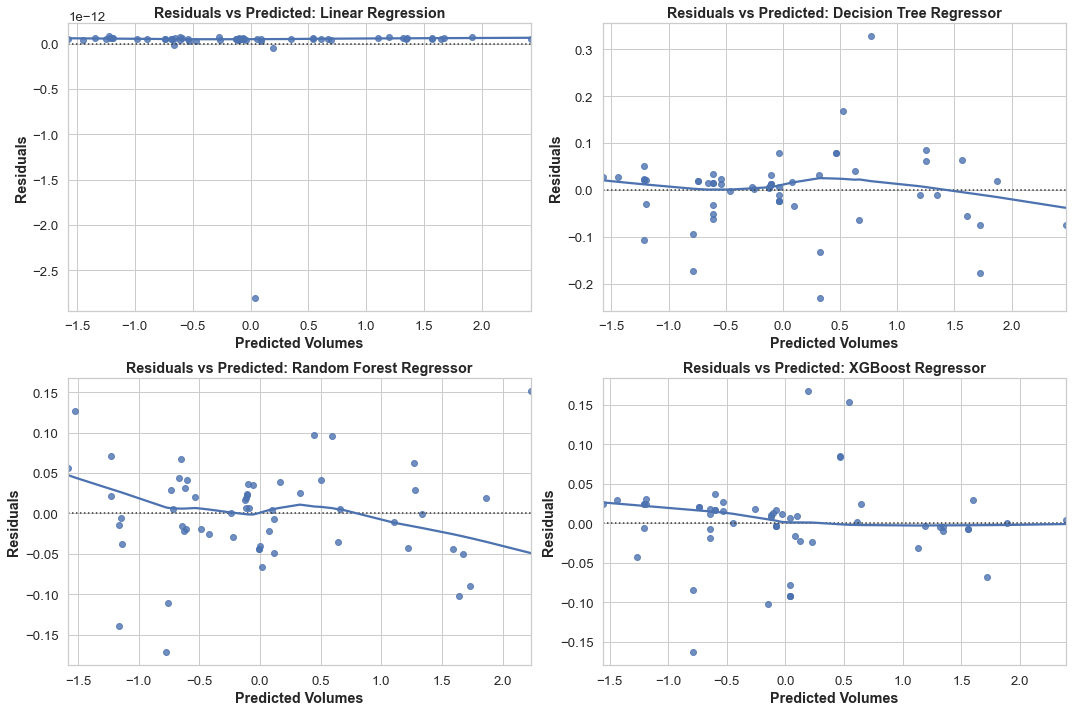

In [34]:
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, (model, prediction) in enumerate(models):
    residuals = y_test - prediction
    sns.residplot(x=prediction, y=residuals, lowess=True, ax=axs[i])
    axs[i].set_xlabel('Predicted Volumes', fontweight='bold')
    axs[i].set_ylabel('Residuals', fontweight='bold')
    axs[i].set_title(f'Residuals vs Predicted: {model}', fontweight='bold')

plt.tight_layout()
plt.show()


# Conclusion:

I applied four different regression models, named Linear Regression, Decision Tree Regressor, Random Forest Regressor, and XGBoost Regressor. To predict trading volume based on liquidity, GDP, and volatility. Among these models, the Random Forest and XGBoost Regressors performed the best with R2 scores of 0.9981 and 0.9987, and RMSE values of 0.04066 and 0.03300 respectively. This indicates that these models have strong predictive power and can be used to accurately forecast trading volume.

# Recommendation:

Based on the results, I recommend using either the Random Forest or XGBoost Regressor model for predicting trading volume. These models showed high accuracy and can be used for forecasting trading volume in financial markets.

# Ethics:

Ethics issues should be taken into account when using machine learning models for financial forecasting. The possibility of bias in the data used to train the models, which may result in biased predictions, is one area of concern. The data must be biased-free and representative of the population in order for the models to be trained. Another concern is the potential for the models to be used for insider trading or other unethical purposes. In order to prevent any unwanted effects, it has to be ensured that the models are utilised responsibly and ethically

In [28]:
###End